# Using Seaborn and Matplotlib Together

Welcome to the second tutorial in our data visualization series. This notebook builds on your matplotlib knowledge and introduces Seaborn, a statistical visualization library built on matplotlib.

## Learning Objectives

By the end of this tutorial, you will be able to:
- Integrate Seaborn with matplotlib for enhanced statistical visualizations
- Create plots with data-driven styling using hue, style, and other parameters
- Implement advanced statistical plots (distribution plots, joint plots, etc.)
- Develop multi-panel visualizations using FacetGrid
- Apply custom themes and styles for consistent visualization aesthetics

## 0. Preparations

In [1]:
# load the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the flights dataset
flights = sns.load_dataset("flights")
print(flights.info())

<class 'pandas.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None


In [3]:
# some data prepration
# add a period column for plotting along time
# make sure to use the format "%Y-%b" matchin the given data: 1949-Feb, 1949-Mar, etc.
flights["period"] = pd.to_datetime(
    flights["year"].astype(str) + "-" + flights["month"].astype(str), format="%Y-%b"
)
flights.head(3)

,year,month,passengers,period
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01


## 1. Line charts
### Revisiting the Line Plot in Matplotlib

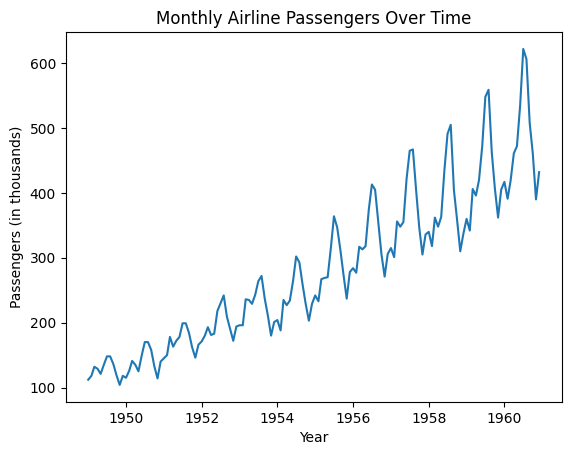

In [4]:
fig, ax = plt.subplots()
ax.plot(
    flights["period"],
    flights["passengers"],
)
ax.set_title("Monthly Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

### Replicating the Line Plot with Seaborn

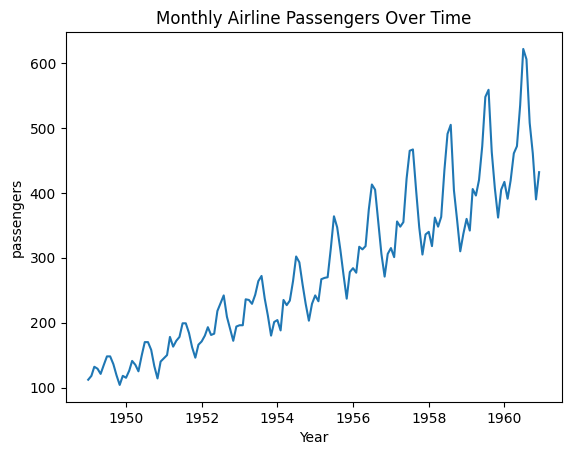

In [5]:
sns.lineplot(data=flights, x="period", y="passengers")
plt.title("Monthly Airline Passengers Over Time")
plt.xlabel("Year")
plt.show()

### Using the object-oriented of matplotlib with Seaborn
This is done by passing `ax` as argument

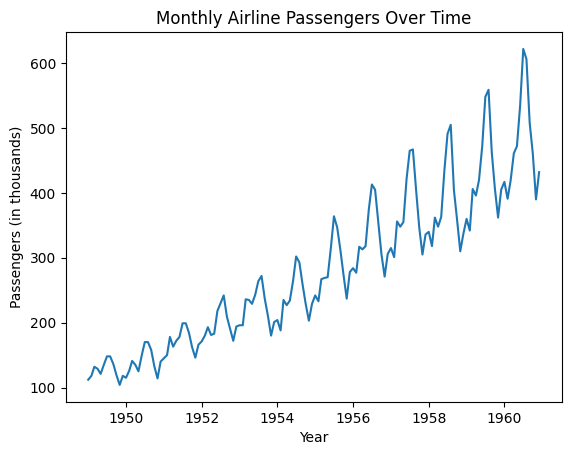

In [6]:
fig, ax = plt.subplots()
sns.lineplot(data=flights, x="period", y="passengers", ax=ax)
ax.set_title("Monthly Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

### Hue: adding more lines to the plot

#### For reference: previous approach using native Matplotlib

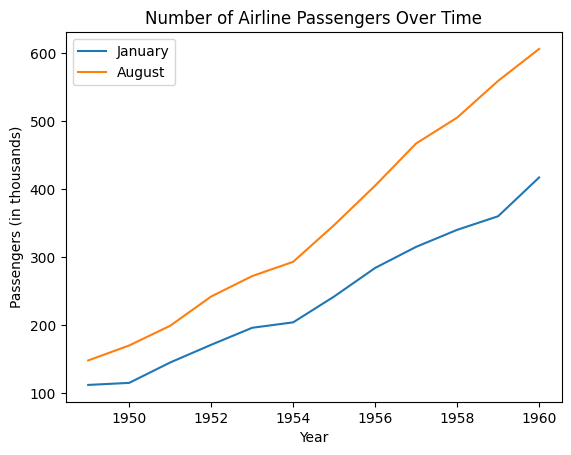

In [7]:
# Step 1: Create a figure and an axis
fig, ax = plt.subplots()

# Step 2: Plot two lines in the same chart
# first: passengers in January across years
ax.plot(
    flights[flights["month"] == "Jan"]["year"],
    flights[flights["month"] == "Jan"]["passengers"],
    label="January",  # this time, directly provide label for use in legend
)
# second: passengers in August across years
ax.plot(
    flights[flights["month"] == "Aug"]["year"],
    flights[flights["month"] == "Aug"]["passengers"],
    label="August",  # this time, directly provide label for use in legend
)

# Step 3: Modify the plot
ax.set_title("Number of Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
ax.legend()

# Step 4: Show the figure
plt.show()

#### Using Seaborn

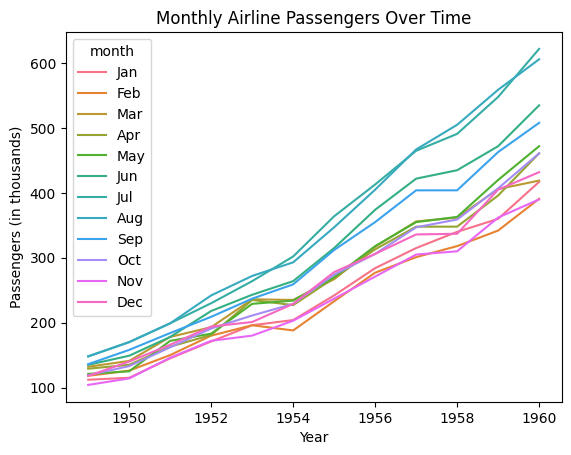

In [8]:
# now let's do this with seaborn: we can easily plot all months directly
fig, ax = plt.subplots()
sns.lineplot(data=flights, x="year", y="passengers", hue="month", ax=ax)
ax.set_title("Monthly Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

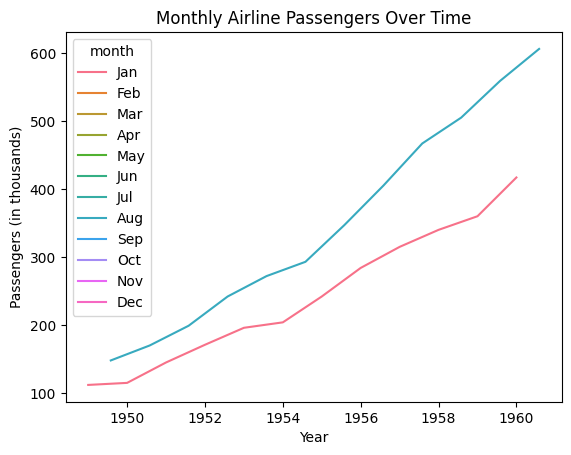

In [9]:
# Or we limit the months to January and August like before
df_plot = flights[flights["month"].isin(["Jan", "Aug"])].copy() # copy not strictly necessary in pandas 3.0+ due to Copy-on-Write, but adds clarity
fig, ax = plt.subplots()
sns.lineplot(data=df_plot, x="period", y="passengers", hue="month", ax=ax)
ax.set_title("Monthly Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

#### Dealing with `category` data type
Notice that the legend includes all months, even if we only plotted January and August
this is because month is a `category` column, and Seaborn automatically includes all categories in the legend
to avoid this, the categories can be reset to only include the months that are plotted.

Note that this will not only change the legend but also the colors of the lines in the plot.

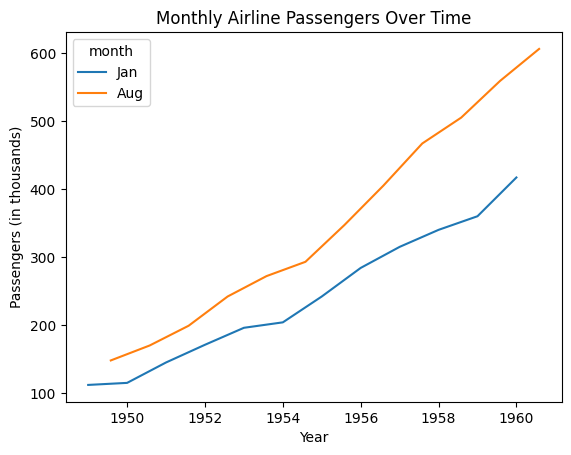

In [10]:
df_plot["month"] = df_plot["month"].cat.remove_unused_categories()
fig, ax = plt.subplots()
sns.lineplot(data=df_plot, x="period", y="passengers", hue="month", ax=ax)
ax.set_title("Monthly Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

#### More options in `sns.lineplot()`
The `sns.lineplot()` function similar options for customizing the appearance of the plot.

For example, we can add markers to the lines and change the line style.

In contrast to Matplotlib, hue, markers and style can be data-dependent (not that I would recommend using all of these options in one chart...)

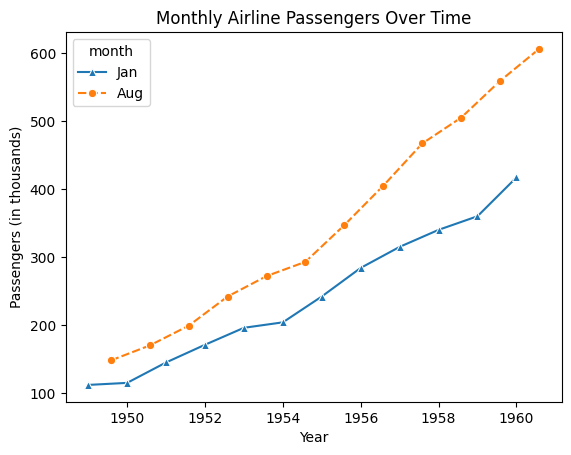

In [11]:
fig, ax = plt.subplots()
sns.lineplot(
    data=df_plot,
    x="period",
    y="passengers",
    hue="month",
    style="month",
    markers=["^", "o"],
    ax=ax,
)
ax.set_title("Monthly Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

## 2. Bar Charts with bells and whistles

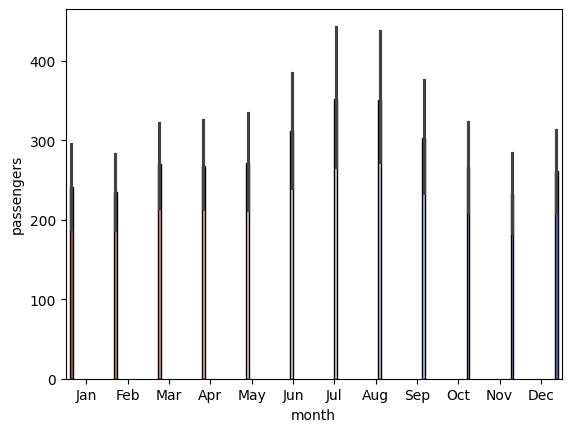

In [12]:
# Seaborn allows us to directly summarize the data and plot it in one step
# Also: adding error bars and a "useful" color palette
sns.barplot(
    data=flights,
    x="month",
    hue="month",
    y="passengers",
    palette="coolwarm_r",
    edgecolor="black",
    legend=False,
)
plt.show()

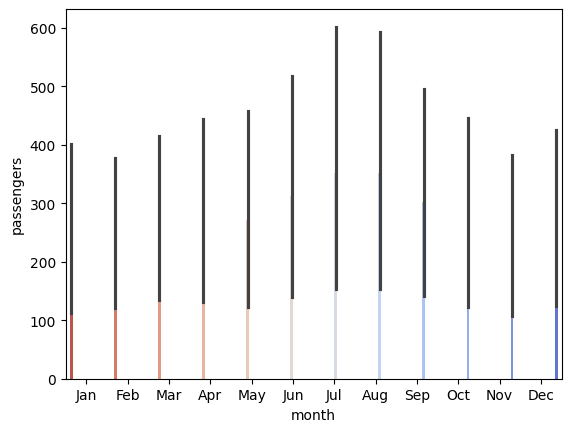

In [13]:
# by default, the error bars represent the 95% confidence interval but we can also use 5th and 95th percentiles
sns.barplot(
    data=flights,
    x="month",
    y="passengers",
    hue="month",
    legend=False,
    errorbar=("pi"),
    palette="coolwarm_r",
)
plt.show()

## 3. Scatter Plots

In [14]:
# Load the tips dataset
tips = sns.load_dataset("tips")
print(tips.info())

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


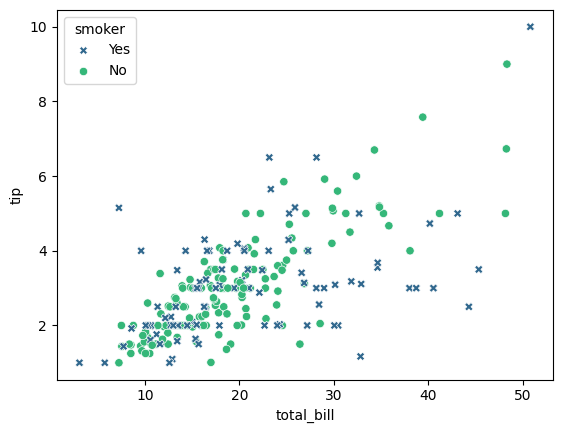

In [15]:
# Create a scatter plot with Seaborn and some customization
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    style="smoker",
    palette="viridis",
    style_order=["No", "Yes"],
)
plt.show()

## 4. Distribution Plots
In the following, we will use the `tips` dataset again.

### 4.1. Histograms

#### A single histogram

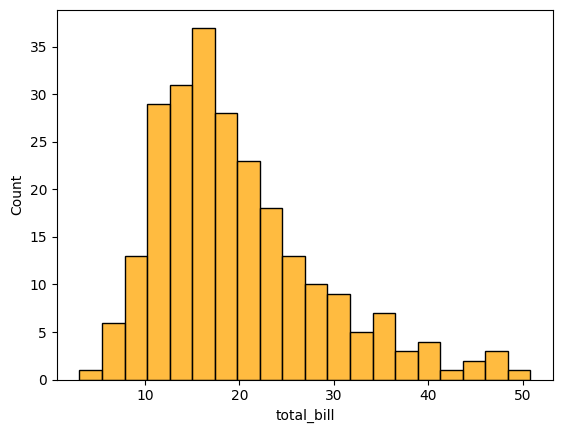

In [16]:
sns.histplot(data=tips, x="total_bill", bins=20, color="orange", edgecolor="black")
plt.show()

#### Multiple histograms in one plot

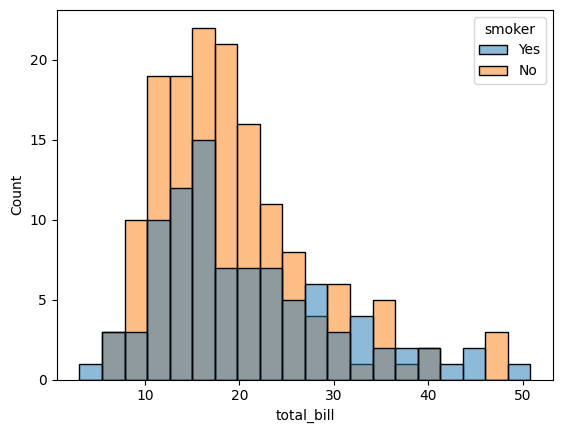

In [17]:
sns.histplot(data=tips, x="total_bill", bins=20, color="orange", edgecolor="black", hue="smoker")
plt.show()

#### Normalization in histograms

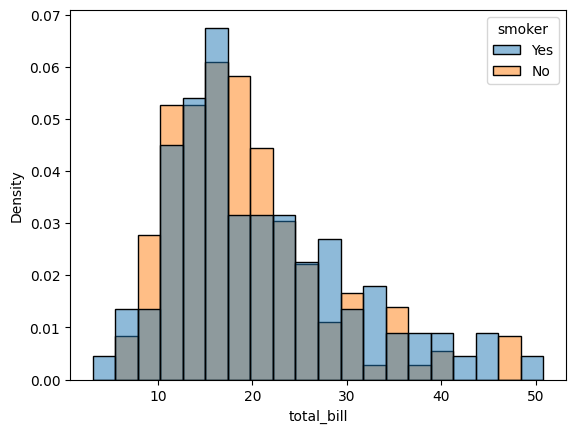

In [18]:
sns.histplot(
    data=tips,
    x="total_bill",
    bins=20,
    color="orange",
    edgecolor="black",
    hue="smoker",
    stat="density",
    common_norm=False,
)
plt.show()

### 4.2. Kernel Density Estimation (KDE) Plots
KDE plots are useful for visualizing the distribution of a continuous variable.
They provide a smoothed estimate of the probability density function of the data.
But note, one drawbar is that the KDE plot does not show the actual data points, especially at the tails of the distribution.

#### Single KDE plot

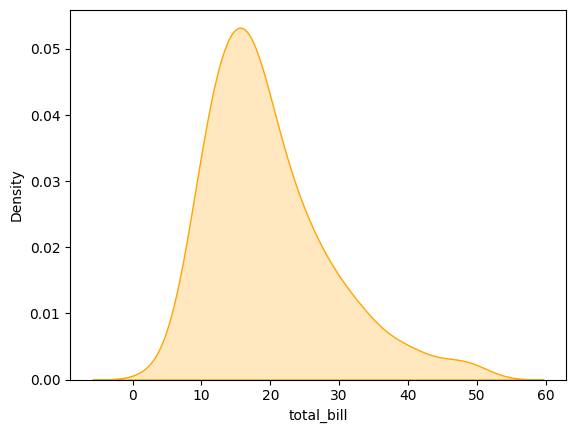

In [19]:
sns.kdeplot(data=tips, x="total_bill", color="orange", fill=True)
plt.show()

# #### Multiple KDE plots

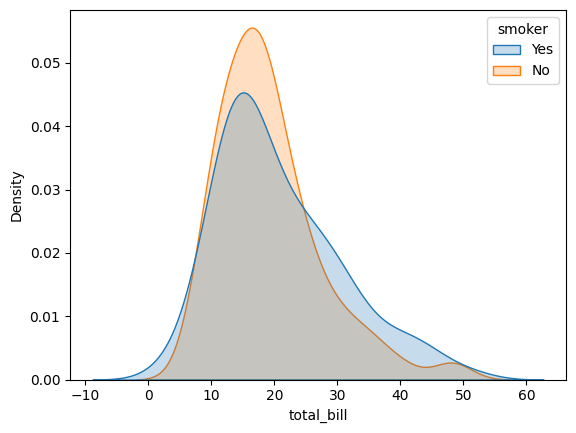

In [20]:
sns.kdeplot(data=tips, x="total_bill", hue="smoker", fill=True, common_norm=False)
plt.show()

#### Combining Histograms and KDE Plots

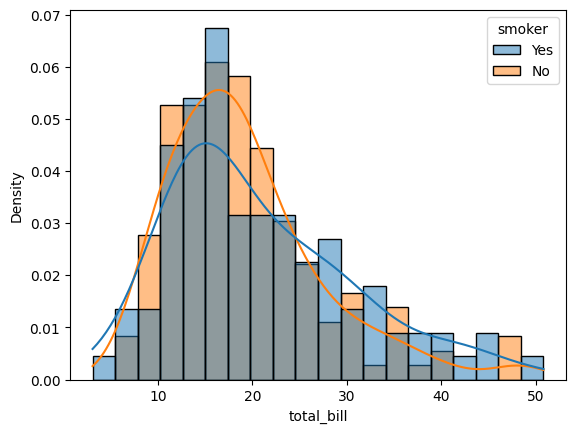

In [21]:
sns.histplot(
    data=tips,
    x="total_bill",
    bins=20,
    color="orange",
    edgecolor="black",
    hue="smoker",
    stat="density",
    common_norm=False,
    kde=True,
)
plt.show()

## 5. Using specialized plotting methods for categorical data
Seaborn provides specialized plotting functions for categorical data, such as `catplot()` and `swarmplot()`.

### 5.1 Categorical Scatter Plots

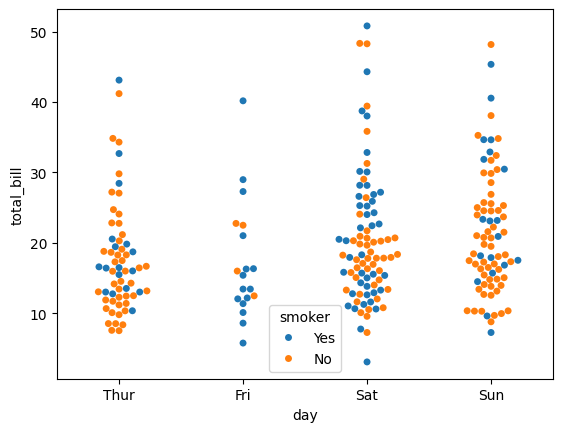

In [22]:
sns.swarmplot(data=tips, x="day", y="total_bill", hue="smoker")
plt.show()

### 5.2 Categorical Box Plots

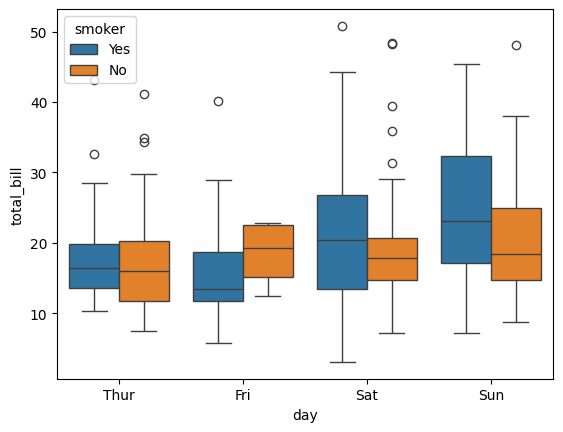

In [23]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker")
plt.show()

### 5.3 Violin Plots

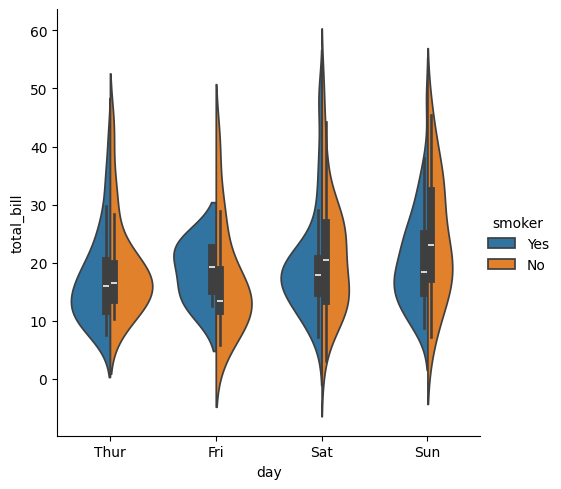

In [24]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
plt.show()

## Exercise:

In this exercise we use the `penguins` dataset from the `seaborn` library:
`penguins = sns.load_dataset("penguins")`

1. Create a scatter plot showing the relationship between `bill_length_mm` and `bill_depth_mm`, using a different color for each `species`.
2. Create histogram with a kernel density estimate on top of it for `body_mass_g` for each `species`.
3. Show the mean `body_mass_g` for each `species` and `sex` using a bar plot. As error bars, show confidence intervals (ci) of 95%.
4. Create a box plot of comparing the `body_mass_g` for each `species` and `sex`.
5. Create a violin plot of comparing the `body_mass_g` for each `species` and `sex`.

## 6. Pair Plots

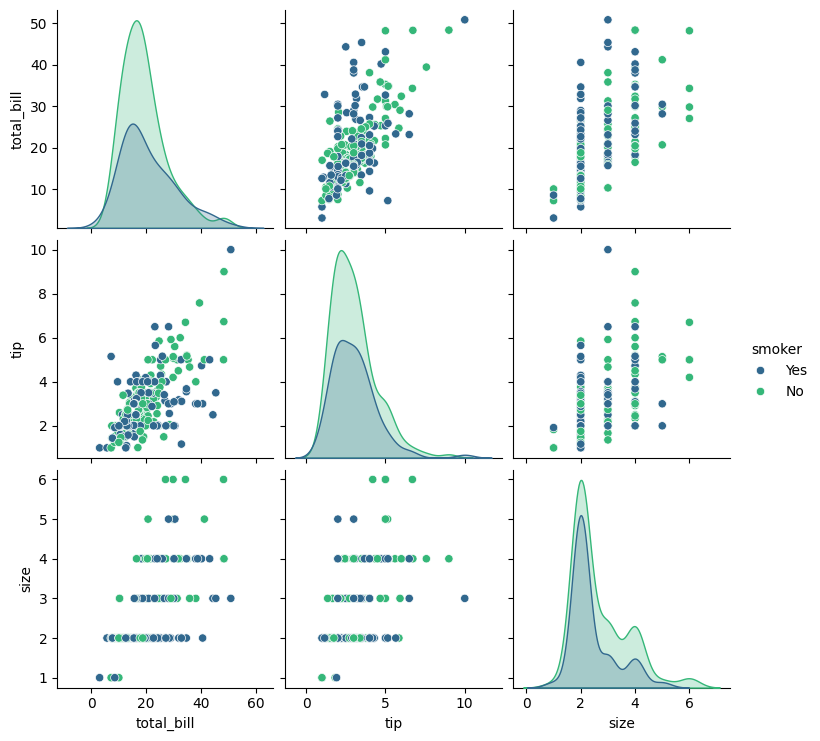

In [25]:
sns.pairplot(tips, hue="smoker", palette="viridis")
plt.show()

## 7. Heatmaps

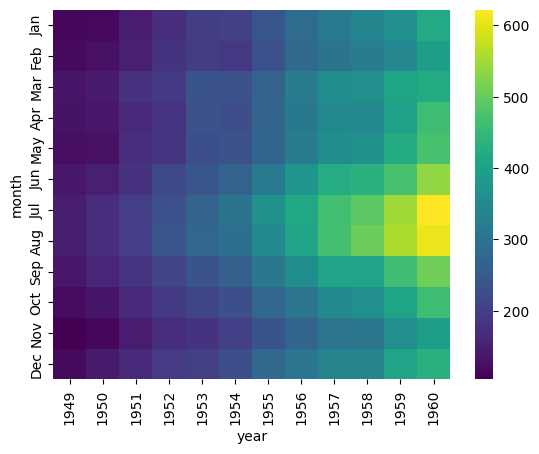

In [26]:
# using the flights dataset
df_plot = flights.pivot_table(index="month", columns="year", values="passengers", observed=True)
sns.heatmap(df_plot, cmap="viridis")
plt.show()

## 8. Joint Plots

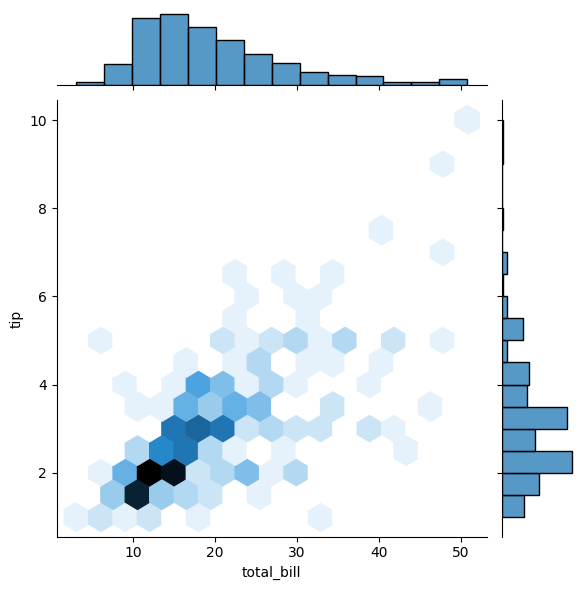

In [27]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")
plt.show()

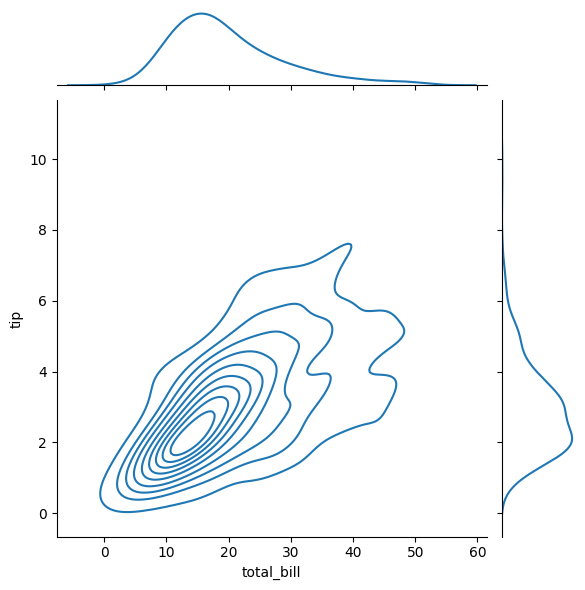

In [28]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="kde")
plt.show()

## 9. Facet Grids

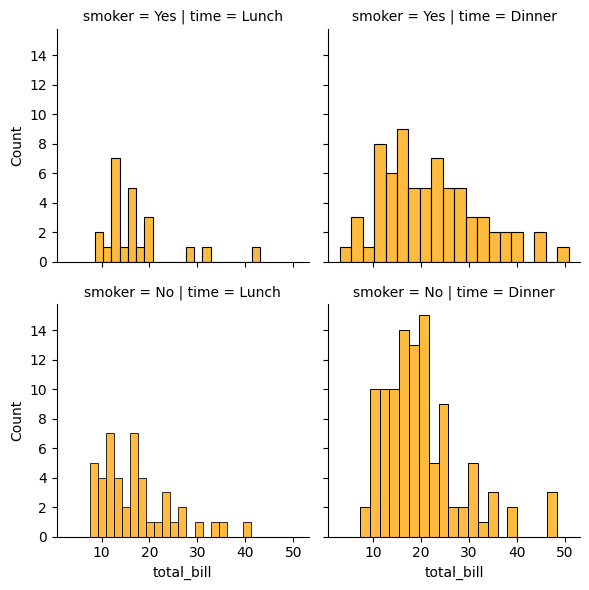

In [29]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(sns.histplot, "total_bill", bins=20, color="orange", edgecolor="black")
plt.show()

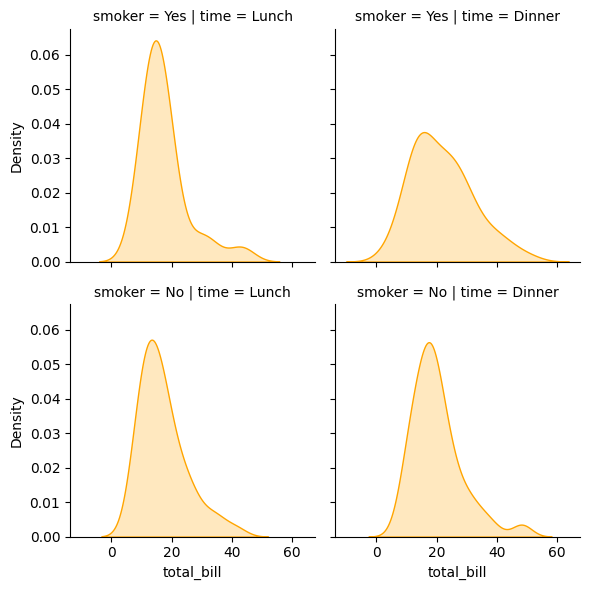

In [30]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(sns.kdeplot, "total_bill", color="orange", fill=True)
plt.show()

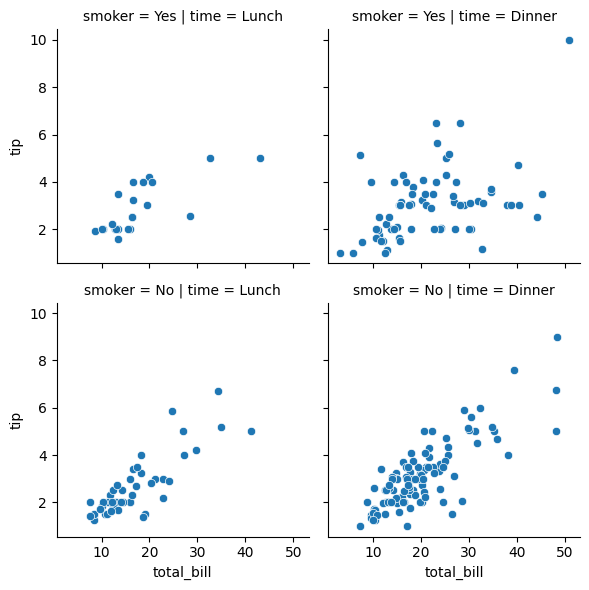

In [31]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()

## 10. Customization Techniques Specific to Seaborn
Seaborn provides several customization options to enhance the appearance of plots.

## 10.1. Setting Styles
Seaborn provides several built-in styles that can be used to customize the appearance of plots.
The available styles are: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`.

In [32]:
# Setting a style
sns.set_style("dark")

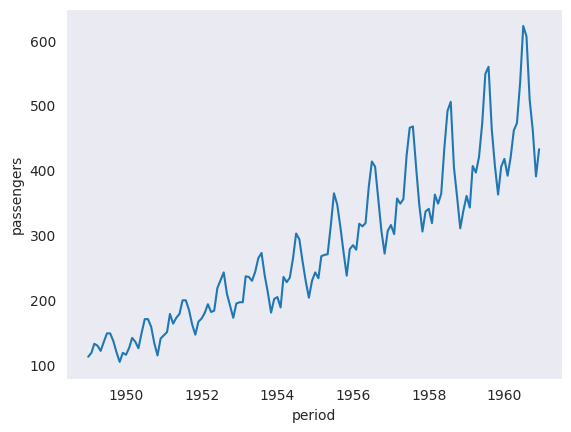

In [33]:
# Creating a plot with the new style
sns.lineplot(data=flights, x="period", y="passengers")
plt.show()

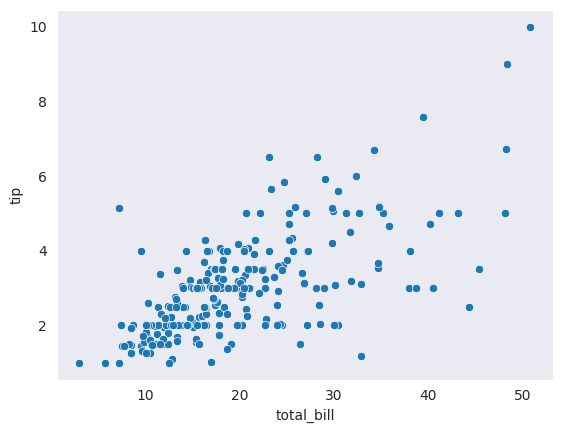

In [34]:
# Style remains active until changed
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.show()

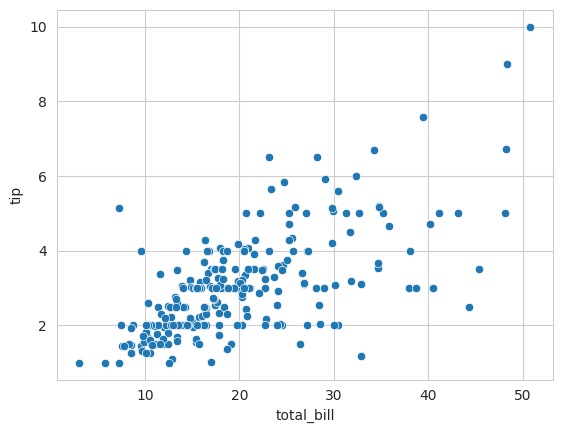

In [35]:
# Setting a style temporarily
with sns.axes_style("whitegrid"):
    sns.scatterplot(data=tips, x="total_bill", y="tip")
    plt.show()

In [36]:
# Resetting the style (and other settings):
sns.set_theme()

## 10.2. Setting Contexts
Seaborn provides several built-in contexts that can be used to control the size of the plot elements.
Ordered by size: `paper` < `notebook` < `talk` < `poster`

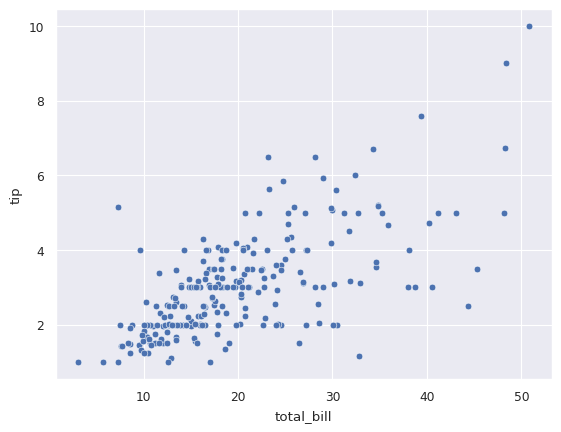

In [37]:
# Paper context
with sns.plotting_context("paper"):
    sns.scatterplot(data=tips, x="total_bill", y="tip")
    plt.show()

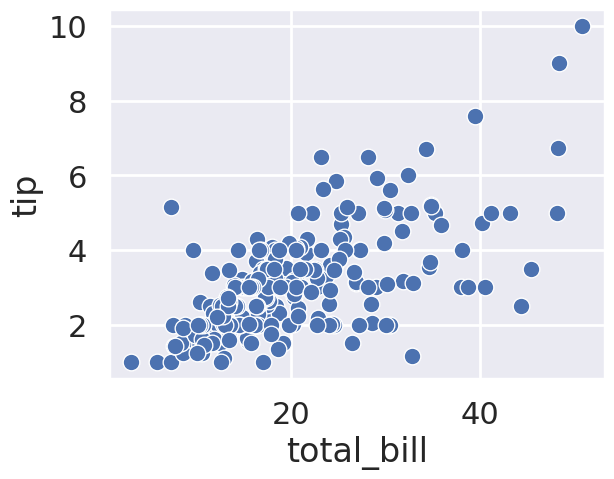

In [38]:
# Poster context
with sns.plotting_context("poster"):
    sns.scatterplot(data=tips, x="total_bill", y="tip")
    plt.show()

## Exercise - continued:
6. Create a heatmap of the correlation matrix of the `penguins` dataset. Hint: select onl the numerical columns and use the `DataFrame.corr()` method.
7. Create a jointplot of `bill_length_mm` and `bill_depth_mm` with a hexbin plot and marginal histograms.
8. Create a 3x1 grid (3 rows, 1 column) with histograms of `bill_length_mm` for each `species`.
9. Create a facet grid with scattplots of `body_mass_g` vs. `flipper_length_mm` for each `species`.
10. Bonus: improve the facet grid from task 2 by adding a reference line at the median value of `bill_length_mm` for each species. Hint: create a new plotting and use it with the `FacetGrid.map()`.
11. Bonus: recreate the heatmap from task 6, but use the style "dark", color palette "viridis" and context "talk"